<a href="https://www.kaggle.com/code/dheerajrhegde/tensorflow-mnist-using-convnet?scriptVersionId=147679485" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
mnist = keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data/255
test_data = test_data/255

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] is None or logs['accuracy'] >0.99:
            print('stopping early since accuracy goal met')
            self.model.stop_training = True
callback = myCallback()
model = keras.Sequential([keras.layers.Conv2D(64,(3,3), activation="relu", input_shape=(28,28,1)),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Conv2D(64, (3,3), activation='relu'),
     keras.layers.MaxPooling2D(2,2), 
     keras.layers.Flatten(),
     keras.layers.Dense(units=128, activation=tf.nn.relu),
     keras.layers.Dense(units=10, activation="softmax")
    ]
)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
model.fit(train_data, train_labels, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1211 - accuracy: 0.9621
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0406 - accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0267 - accuracy: 0.9917


In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

layer_outputs= [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [7]:
f1 = activation_model.predict(test_data[0:2].reshape(2,28,28,1))[3]

1/1 [==============================] - 0s 100ms/step


In [8]:
f1.shape

(2, 5, 5, 64)

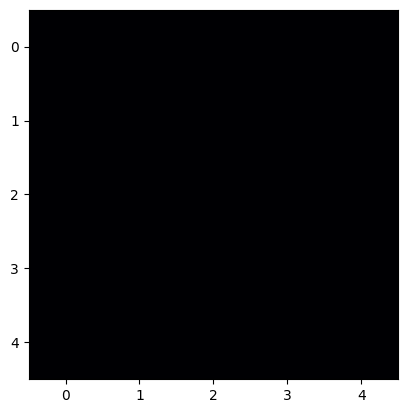

In [9]:
plt.imshow(f1[0,:,:,63], cmap="inferno")

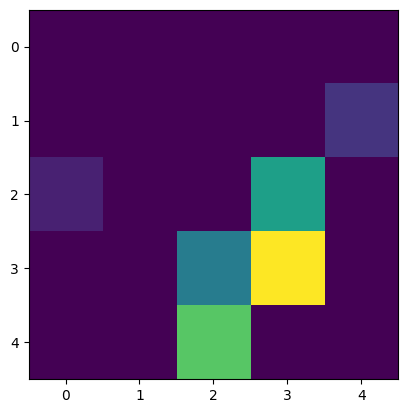

In [10]:
plt.imshow(f1[0,:,:,2])

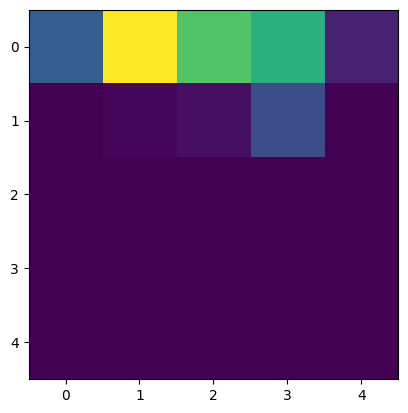

In [11]:
plt.imshow(f1[0,:,:,3])